# Графы

## Связность и разреженность графов. 


![title](images/Снимок_экрана1.jpg)


## Гигантсткие компоненты


![title](images/Снимок_экрана2.jpg)


## Диаметр сложных сетей


![title](images/Снимок_экрана3.jpg)


## Устойчивость гигантской компоненты


![title](images/Снимок_экрана4.jpg)

![title](images/Снимок_экрана4_1.jpg)



## Устойчивость к атакам на хабы


![title](images/Снимок_экрана5.jpg)

![title](images/Снимок_экрана5_2.jpg)

![title](images/Снимок_экрана5_3.jpg)


## Степенной закон распределения вершин


![title](images/Снимок_экрана6.jpg)


## Задачи

### Задача 1. Рассмотрим модель случайных графов на n вершинах, в котором каждое из возможных ребер проводится независимо от всех остальных с с одной и той же вероятностью. Используя библиотеку NetworkX, сгегенрируйте граф на 1000 вершинах при р=0,003. Оцените разницу между количеством ребер и их ожидаемым количеством. Постройте график распределения вершин в log-log координатах. Оцените степенную зависимость закона распределения вершин. 

In [26]:
import networkx as nx
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 10

In [27]:
G = nx.gnp_random_graph(1000, 0.003)

In [28]:
## ваш код здесь для подсчета количества сгенерированных ребер и ожидаемого их количества
import itertools

x = G.nodes()
number_of_nodes = len(list(itertools.combinations(x, 2)))
print("Ожидаемое количество рёбер:", round(0.003 * number_of_nodes))
print("Колличество рёбер в графе: ", G.number_of_edges())

Ожидаемое количество рёбер: 1498
Колличество рёбер в графе:  1540


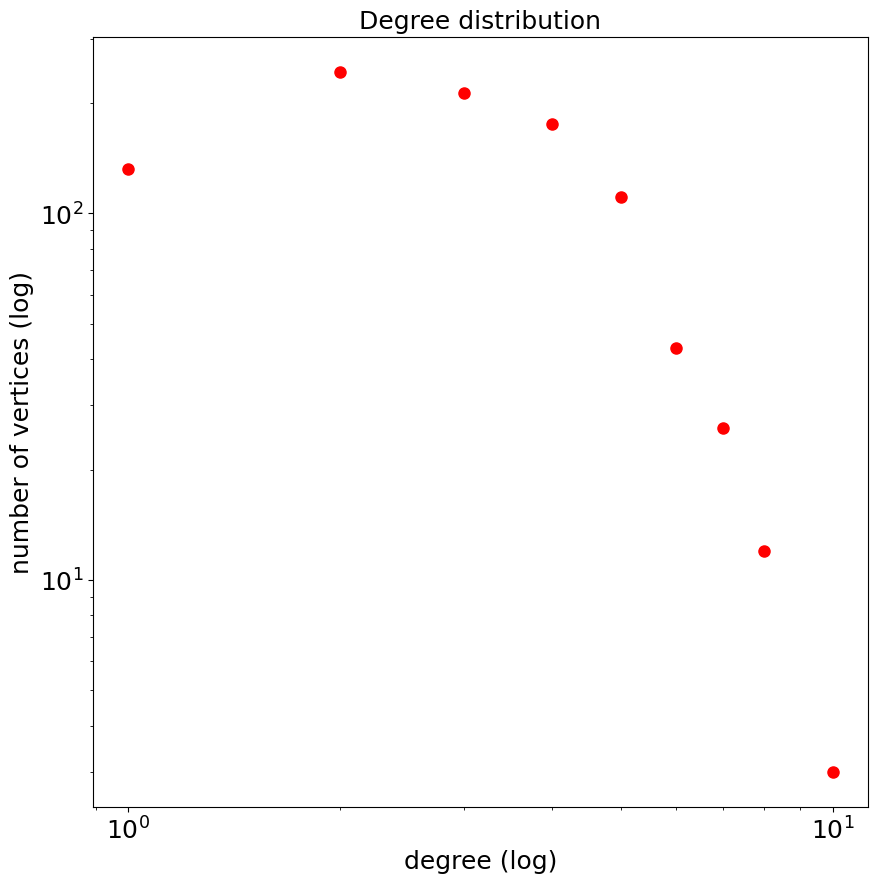

In [29]:
# подсчет количества вершин каждой степени
degrees = dict()
for degree in dict(G.degree()).values():
    if degree in degrees:
        degrees[degree] += 1
    else:
        degrees[degree] = 1
# Ваш код для формирования такого же словаря, с помощью библиотечных функций


sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)
plt.xlabel("degree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.show()

### Задача 2. Найдите число компонено связности в графе из предыдущей задачи. Есть ли в нем гигантская уомпонента? Сколько в ней вершин, каков ее диаметр? Удажите из графа 10- ую часть вершин. Остентся ли в графе гигантская компонента? Сделайте исследование при какой доле вершин гигантская компонента разрушается.

In [30]:
components = nx.number_connected_components(G)
print (components)
giant_component_list = sorted(nx.connected_components(G), key=len, reverse=True) # reverse для сортировки по убыванию
giant_component = G.subgraph(giant_component_list[0])
print (G.subgraph(giant_component))
# print(len(max(nx.connected_components(G), key=len))) # количество вершин в гигантской компоненте
print (nx.diameter(giant_component))


46
Graph with 950 nodes and 1535 edges
13


In [31]:
# Ваш код здесь для удаления 10 процентов случайных вершин
import random

H = G.copy()
for node in list(H.nodes()):
    if random.random() < 0.1:
        H.remove_node(node)

In [32]:
# вывести количество оставшихся вершин, количество компонент связности, гигантскую компоненту связности
comps = list(nx.connected_components(H))
print(H.order())
print(len(comps))
print(len(comps[0]))

895
57
831


### Задача 3. Найдите число компонено связности в графе из предыдущей задачи. Есть ли в нем гигантская уомпонента? Сколько в ней вершин, каков ее диаметр? Удажите из графа 50 самых больших по степени вершин. Остентся ли в графе гигантская компонента? Сделайте исследование при какой доле вершин гигантская компонента разрушается.

In [33]:
# Ваш код здесь для удаления 50 вершин-хабов
H = G.copy()
nodes = sorted(H.nodes(), key=lambda v: H.degree(v), reverse=True)
for node in nodes[:100]:
    H.remove_node(node)

print(H.order())
print(len(next(nx.connected_components(H))))

900
774


In [34]:
# вывести количество оставшихся вершин, количество компонент связности, гигантскую компоненту связности
comps = list(nx.connected_components(H))
print(H.order())
print(len(comps))
print(len(comps[0]))

900
105
774
